<a href="https://colab.research.google.com/github/harsh-tambi/CNN_CIFAR10_Dataset/blob/main/Improved_Version_of_CNN_ON_CIFAR10_Datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
K = len(set(y_train))

In [16]:
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)



In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)



In [ ]:
#Applying Data Augmentation here to improve our results a bit
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0]//batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


<ipython-input-18-0b1e4fde9d11>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)


 415/1562 [======>.......................] - ETA: 6:55 - loss: 1.8249 - accuracy: 0.3928

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print ('Normalized Confusion Matrix')
  else:
    print ('Confusion Matrix, without normalisation')

  print (cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = ".2f" if normalize else 'd'
  thresh = cm.max()/ 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color='white' if cm[i, j] > thresh else "black"
             )
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))








In [10]:
labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split()

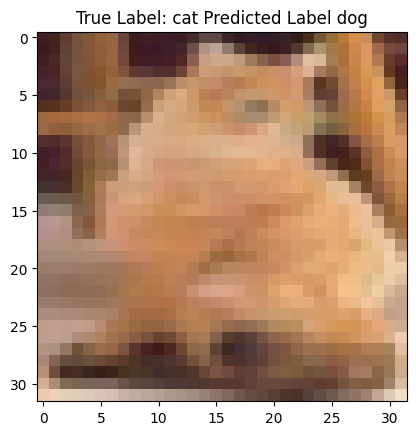

In [13]:
#Now we could check the miusclassified examples like this to actually check what has been going wrong when predicting these values

missclassfied_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassfied_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s Predicted Label %s" % (labels[y_test[i]], labels[p_test[i]]));

In [13]:
# we can see how the deep learning model predicts this image aas a dog, when in reality its a cat.